In [85]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [86]:
# process wine data into separate training and test sets 
from sklearn.cross_validation import train_test_split # this method allow us to split the data
from sklearn.preprocessing import StandardScaler
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = \
            train_test_split(X,y,test_size=0.3, random_state=0) # train_test_split takes N datasets,
                                                                # and subsequently splits each sequentially twice
                                                                # the first return is the training, second is test
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test) # use same transform from X_train on X_test

In [87]:
print np.mean(X_train_std[:,1]) # and we have mean zero, stddev 1
print np.std(X_train_std[:,1])

-1.2341158561e-15
1.0


In [88]:
# now we can construct the covariance matrix from the standardized feature set
# always a d x d dataset (dimension x dimension)
# stores pairwise covariances between different features
# covariance(j,k) where j,k are attributes = 1/n * sum of all (xij - mean of j) * sum of all (xik - mean of k)
# positive covariance means features increase together and negative means vary in opposite directions
# covariance matrix given as greek sigma
# the eigenvectors of the covariance matrix represent the principal components (the directions of maximum variance)
# the eigenvalues define their magnitude
# 13 eigenvectors would be returned in the wine dataset because we have 13 attributes

In [93]:
cov_matrix = np.cov(X_train_std.T)
cov_matrix.shape

(13, 13)

In [95]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print '\nEigenvalues \n%s' % eigen_vals


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.33051429  0.08414846  0.29595018  0.16831254  0.21432212
  0.2399553 ]


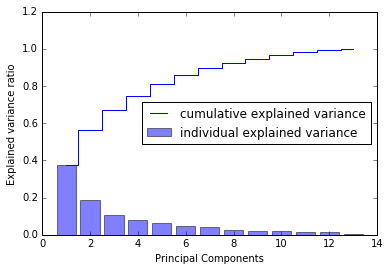

In [96]:
# lets look at the total variance explained by the eigenvalues
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

In [97]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[0]

(4.892308303273742,
 array([-0.14669811,  0.24224554,  0.02993442,  0.25519002, -0.12079772,
        -0.38934455, -0.42326486,  0.30634956, -0.30572219,  0.09869191,
        -0.30032535, -0.36821154, -0.29259713]))

In [129]:
# stack up the first two principal components
# projection matrix W 
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print w
print w.shape

[[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]
(13, 2)


In [121]:
# transform one record or sample x of 1x13 onto PCA subspace obtaining x', a now two dimensional sample vector
# consisting of two new features
print X_train_std[0]
# to
print X_train_std[0].dot(w)


[ 0.91083058 -0.46259897 -0.01142613 -0.82067872  0.06241693  0.58820446
  0.93565436 -0.7619138   0.13007174 -0.51238741  0.65706596  1.94354495
  0.93700997]
[-2.59891628  0.00484089]
(124, 13)


In [122]:
# transform the entire data set to two dimensions:
X_train_pca = X_train_std.dot(w)
print X_train_std.shape
print X_train_std.dot(w).shape

(124, 13)
(124, 2)


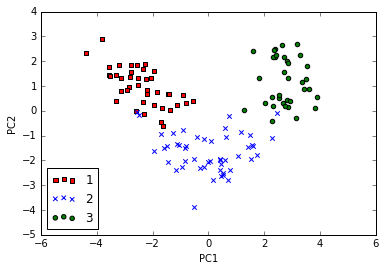

In [104]:
colors = ['r','b','g']
markers = ['s','x','o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l,0],
                X_train_pca[y_train==l,1], # y_train == l indexes based on position of y train to x train
                c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [112]:
# data is more spread along x axis instead of y, indicating PC1's pull on variance of data
# we can tell a linear classifier will be able to separate the classes well

array([], dtype=float64)

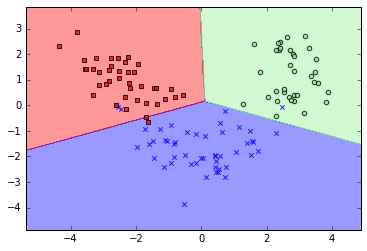

In [116]:
# PCA IN SKLEARN

# PCA Is a transformer class in SKLEARN where we first fit model using training data before we transform training
# and test sets

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y =X[y == cl, 1],
                   alpha = 0.8, c=cmap(idx),
                    marker=markers[idx], label = cl)

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)

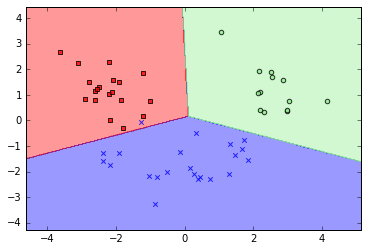

In [117]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)

In [126]:
# if we are interested in explained variance ratios of differenct principal components, we can simply initialize the
# PCA class with n_components set to None
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
print pca.explained_variance_ratio_
print pca.components_.shape

[ 0.37329648  0.18818926]
(2, 13)


In [127]:
X_train_pca = pca.fit(X_train_std)

In [128]:
X_train_pca.components_.shape

(2, 13)

## Linear Discriminant Analysis Overview

### Constructing the mean vectors

In [132]:
# lets look @ the actual mean vectors below
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis = 0))
    print 'MV of class %s: %s \n' %(label, mean_vecs[label-1])

MV of class 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017] 

MV of class 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016] 

MV of class 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912] 



In [142]:
d = 13 # number of features
S_W = np.zeros((d,d)) # create a placeholder within class Scatter Matrix
for label, mv in zip(range(1,4), mean_vecs): # loop through each class and their mean vectors
    class_scatter = np.zeros((d,d)) # create a placeholder for each class' scatter matrix
    for row in X_train[y_train == label]: # loop through each class in the original data set 
        row, mv = row.reshape(d,1), mv.reshape(d,1) # reshape each row in the data set to 13x1 as well as mean vec
        class_scatter += (row-mv).dot((row-mv).T) # subtract the mean vector from each row and take dot of the same
                                                  # transposed ( 1x13 )
    S_W += class_scatter                          # add class variance to the class-wide scatter matrix
print 'Within class scatter matrix: %s x %s' %(S_W.shape[0], S_W.shape[1])
print S_W

Within class scatter matrix: 13 x 13
[[  2.0937e+04   3.8379e+03   3.8084e+03   3.1444e+04   1.6113e+05
    3.6429e+03   3.1753e+03   5.8295e+02   2.5974e+03   8.0703e+03
    1.5380e+03   4.1888e+03   1.1991e+06]
 [  3.8379e+03   8.1419e+02   6.9998e+02   5.8391e+03   2.9455e+04
    6.7134e+02   5.8347e+02   1.0596e+02   4.8443e+02   1.4681e+03
    2.8322e+02   7.7714e+02   2.1631e+05]
 [  3.8084e+03   6.9998e+02   7.0907e+02   5.7965e+03   2.9305e+04
    6.6444e+02   5.8001e+02   1.0889e+02   4.7127e+02   1.4320e+03
    2.7049e+02   7.6193e+02   2.1335e+05]
 [  3.1444e+04   5.8391e+03   5.7965e+03   4.8608e+04   2.4198e+05
    5.5317e+03   4.7943e+03   8.1056e+02   3.9346e+03   1.2066e+04
    2.3816e+03   6.3658e+03   1.7596e+06]
 [  1.6113e+05   2.9455e+04   2.9305e+04   2.4198e+05   1.2684e+06
    2.8018e+04   2.4507e+04   4.5587e+03   2.0226e+04   6.2381e+04
    1.1872e+04   3.2215e+04   9.4345e+06]
 [  3.6429e+03   6.7134e+02   6.6444e+02   5.5317e+03   2.8018e+04
    6.6324e+02  

In [152]:
print 'class label distribution: %s' %np.bincount(y_train)[1:]

class label distribution: [40 49 35]


In [181]:
# within class variance using covariance matrix
d = 13
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
    print S_W, '\n\n---------\n'
print 'Scaled within class scatter matrix: %s x % s' %(S_W.shape[0], S_W.shape[1])

[[  3.3974e-01  -2.9437e-02  -7.4857e-02  -1.5021e-01   6.3348e-02
    1.7337e-01   1.1352e-01   3.1677e-03   1.8239e-01   1.2418e-01
    1.5711e-02   4.8009e-02   1.3121e-01]
 [ -2.9437e-02   4.0295e-01  -5.6569e-04   3.6551e-02   2.5722e-02
   -2.5128e-02  -4.4637e-02  -2.4078e-02   1.7382e-02  -9.3623e-02
   -1.2941e-01   4.4168e-02  -1.8266e-01]
 [ -7.4857e-02  -5.6569e-04   7.4525e-01   3.1927e-01   2.8338e-01
    3.9831e-02  -8.8447e-03   2.4021e-01  -6.6190e-02  -4.4734e-02
    6.6210e-02  -1.3620e-02  -6.9197e-02]
 [ -1.5021e-01   3.6551e-02   3.1927e-01   5.3701e-01   1.1142e-01
   -1.2070e-01  -8.9739e-02   1.3175e-01  -1.2954e-01  -8.6895e-02
    1.5935e-02  -3.1111e-02  -8.4022e-02]
 [  6.3348e-02   2.5722e-02   2.8338e-01   1.1142e-01   4.5878e-01
    1.3539e-01   6.1565e-02   6.4705e-02   1.0518e-02   5.8374e-02
   -2.1671e-02   7.4840e-02  -9.8821e-02]
 [  1.7337e-01  -2.5128e-02   3.9831e-02  -1.2070e-01   1.3539e-01
    3.8905e-01   2.2572e-01  -4.5686e-02   1.7230e-01

In [165]:
mean_overall = np.mean(X_train_std, axis = 0)
d = 13
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d,1)
    mean_overall = mean_overall.reshape(d,1)
S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print 'Between class scatter matrix %s x %s' %(S_B.shape[0], S_B.shape[1])

Between class scatter matrix 13 x 13


In [172]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [177]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
for eigen_val in eigen_pairs:
    print eigen_val[0]
eigen_pairs[0]

269.799757873
3.51372076497e-14
1.40391706921e-14
1.40391706921e-14
1.17356928962e-14
1.1458627439e-14
1.1458627439e-14
5.69242632288e-15
5.69242632288e-15
1.87278078355e-15
1.87278078355e-15
1.34357098355e-15
2.35810912208e-16


(269.79975787296593,
 array([ 0.0102+0.j,  0.0823+0.j,  0.0546+0.j,  0.1220+0.j, -0.0062+0.j,
         0.2257+0.j, -0.8044+0.j, -0.0942+0.j,  0.0508+0.j,  0.2398+0.j,
        -0.1122+0.j, -0.3914+0.j, -0.2062+0.j]))

# LDA via Scikit Learn

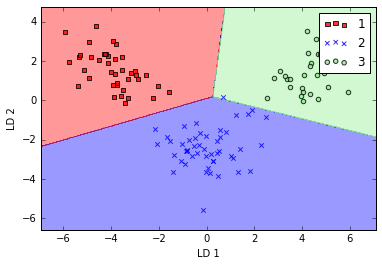

In [174]:
from sklearn.lda import LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train) # must provide class labels
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

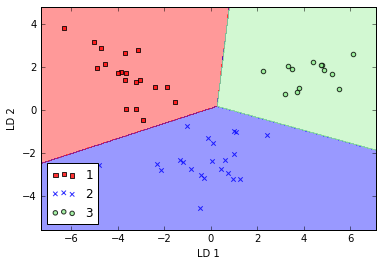

In [175]:
from sklearn.lda import LDA
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()